# DADATON 2019

Integrantes:
* Katherine Ramírez Cubillos
* Francisco Perea De Zubiría
* Jose Sebastian Estepa

In [318]:
# Data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


#Visualitation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.style.use('seaborn-poster')

#Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Data manipulation with scikit learning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Models
import statsmodels.api as sm2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics and hyperparameters
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, classification_report
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve 


### Base Training

In [289]:
Riesgo= pd.read_csv('Datos_modelo_train_2.csv')
Riesgo.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
Riesgo.drop(["a"], axis=1, inplace=True)
Riesgo.head()


,id,f_analisis,var_rpta,segmento,valor_total_transferido,n_transacciones_exitosas,val_por_transaccion
0,1,201803.0,0.0,4.0,0.0,0,0.000000
1,2,201604.0,0.0,0.0,0.0,233,0.000000
2,3,201608.0,0.0,5.0,123954.1,0,0.000000
3,4,201706.0,0.0,4.0,0.0,6,0.000000
4,5,201703.0,0.0,4.0,5547550.0,1671,3319.898265


In [262]:
Riesgo.dtypes

id                            int64
f_analisis                  float64
var_rpta                    float64
segmento                    float64
valor_total_transferido     float64
n_transacciones_exitosas      int64
val_por_transaccion         float64
disposit                    float64
dtype: object

In [263]:
# Tratamiento de los NA
Riesgo.isnull().sum()

id                          0
f_analisis                  1
var_rpta                    1
segmento                    1
valor_total_transferido     1
n_transacciones_exitosas    0
val_por_transaccion         0
disposit                    1
dtype: int64

In [267]:
#Si hay valores NA (aplicar esto)
#Riesgo= Riesgo.drop(columns="nombrecolumna") #si hay que eliminar una columna
Riesgo= Riesgo.drop(columns='f_analisis')
Riesgo= Riesgo.drop(columns='segmento')
Riesgo =Riesgo.dropna()
Riesgo.isnull().sum()

id                          0
var_rpta                    0
valor_total_transferido     0
n_transacciones_exitosas    0
val_por_transaccion         0
disposit                    0
dtype: int64

#### Exploración de datos

In [268]:
Riesgo.var_rpta.value_counts() #Mira si esta balancada

0.0    35214
1.0     2786
Name: var_rpta, dtype: int64

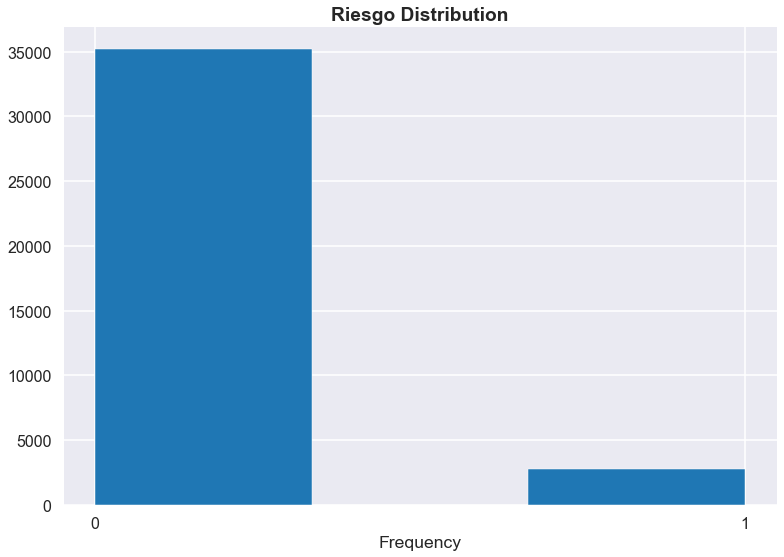

In [269]:
#Histograma para comprobar balanceo
Riesgo['var_rpta'].hist(bins=3);
plt.xticks([0,1]);
plt.title("Riesgo Distribution",fontweight="bold" )
plt.xlabel("Frequency");

#### Estandarización de la información

In [271]:
std_scaler = StandardScaler()

#cambiar nombre de las variables
# 'id', 'segmento',"valor_total_transferido","n_transacciones_exitosas", "val_por_transaccion"

Riesgo['id'] = std_scaler.fit_transform(Riesgo['id'].values.reshape(-1,1))
Riesgo['valor_total_transferido'] = std_scaler.fit_transform(Riesgo['valor_total_transferido'].values.reshape(-1,1))
Riesgo['n_transacciones_exitosas'] = std_scaler.fit_transform(Riesgo['n_transacciones_exitosas'].values.reshape(-1,1))
Riesgo['val_por_transaccion'] = std_scaler.fit_transform(Riesgo['val_por_transaccion'].values.reshape(-1,1))
Riesgo['disposit'] = std_scaler.fit_transform(Riesgo['disposit'].values.reshape(-1,1))

In [272]:
Riesgo.head()

,id,var_rpta,valor_total_transferido,n_transacciones_exitosas,val_por_transaccion,disposit
0,-1.732005,0.0,-0.060311,-0.603192,-0.012250,-1.332588
1,-1.731914,0.0,-0.060311,-0.328203,-0.012250,-1.332588
2,-1.731823,0.0,-0.060136,-0.603192,-0.012250,0.287355
3,-1.731732,0.0,-0.060311,-0.596110,-0.012250,-1.332588
4,-1.731641,0.0,-0.052481,1.368934,-0.012242,0.287355


#### Balanceo base de datos

In [273]:
df = Riesgo.sample(frac=1)

df_Riesgo = df.loc[df['var_rpta'] == 1]
df_n_Riesgo = df.loc[df['var_rpta'] == 0][:2786] #Cambiar este número por el de nuestra base

df_tamaño = pd.concat([df_Riesgo, df_n_Riesgo])
df = df_tamaño.sample(frac=1, random_state=42)

df.var_rpta.value_counts()

1.0    2786
0.0    2786
Name: var_rpta, dtype: int64

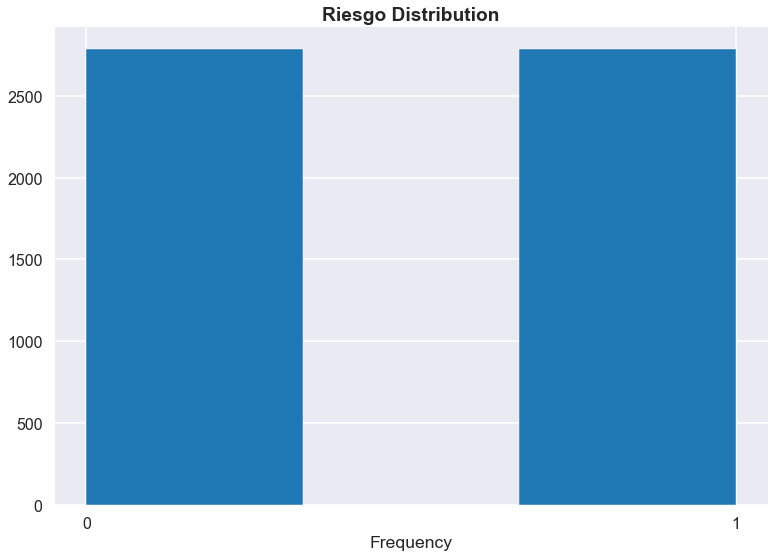

In [274]:
#Histograma para comprobar balanceo
df['var_rpta'].hist(bins=3);
plt.xticks([0,1]);
plt.title("Riesgo Distribution",fontweight="bold" )
plt.xlabel("Frequency");

#### Exportar base de datos

In [ ]:
ruta1= "C:/Users/Acer" #ruta de tu computador
df.to_csv(ruta1)

### Base test

In [275]:
Riesgo_t= pd.read_csv('Datos_modelo_predict_3.csv')
Riesgo_t.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
Riesgo_t.drop(["a"], axis=1, inplace=True)
Riesgo_t.head()


,id,valor_total_transferido,n_transacciones_exitosas,val_por_transaccion,disposit
0,76537.0,0.000000e+00,0,0.000000e+00,1.0
1,76538.0,2.122750e+06,98,2.166071e+04,5.0
2,76539.0,5.419362e+07,907,5.975041e+04,3.0
3,76540.0,0.000000e+00,338,0.000000e+00,3.0
4,76541.0,2.863384e+07,8,3.579230e+06,3.0


In [276]:
Riesgo_t.dtypes

id                          float64
valor_total_transferido     float64
n_transacciones_exitosas      int64
val_por_transaccion         float64
disposit                    float64
dtype: object

#### Procesamiento de datos

In [277]:
# Tratamiento de los NA
Riesgo_t.isnull().sum()

id                          0
valor_total_transferido     1
n_transacciones_exitosas    0
val_por_transaccion         0
disposit                    1
dtype: int64

In [278]:
#Si hay valores NA (aplicar esto)
#Riesgo= Riesgo.drop(columns="nombrecolumna") #si hay que eliminar una columna
Riesgo_t =Riesgo.dropna()
Riesgo_t.isnull().sum()

id                          0
var_rpta                    0
valor_total_transferido     0
n_transacciones_exitosas    0
val_por_transaccion         0
disposit                    0
dtype: int64

#### Exportar de datos

In [ ]:
ruta1= "H:/" #ruta de tu computador
Riesgo_t.to_csv(ruta1)

### Significancia de los betas

In [286]:
df2=df

X=np.array(df2[["valor_total_transferido","n_transacciones_exitosas","val_por_transaccion", "disposit"]])
y=np.array(df2["var_rpta"])
X.shape

(5572, 4)

In [287]:
ll_model=sm.Logit(y,X)
result=ll_model.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689562
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5568
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Dec 2019   Pseudo R-squ.:                0.005172
Time:                        18:23:45   Log-Likelihood:                -3842.2
converged:                       True   LL-Null:                       -3862.2
Covariance Type:            nonrobust   LLR p-value:                 1.093e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1016      0.133     -

## Modelos 

In [292]:
# Definir conjunto de prueba y de testeto

train= df
test= Riesgo_t


y_train = np.array(train["var_rpta"])
X_train = np.array(train[["valor_total_transferido","n_transacciones_exitosas","val_por_transaccion", "disposit"]])

y_test = np.array(test["var_rpta"])
X_test = np.array(test[["valor_total_transferido","n_transacciones_exitosas","val_por_transaccion","disposit"]])

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5572, 4) (5572,)
Test set: (38000, 4) (38000,)


### Logistico

In [293]:
logit1 = LogisticRegression()
logit_model1 = logit1.fit(X_train,y_train)
logit_model1



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
print ('Coefficients: ', logit_model1.coef_)

Coefficients:  [[-0.13662886 -0.00277166 -0.76894518 -0.15783684]]


In [295]:
logit_pred1 = logit_model1.predict(X_test)
logit_pred1

array([1., 1., 0., ..., 1., 1., 1.])

In [296]:
logit_prob = logit.predict_proba(X_test)
logit_prob

array([[0.26551396, 0.73448604],
       [0.2792281 , 0.7207719 ],
       [0.51334055, 0.48665945],
       ...,
       [0.26877051, 0.73122949],
       [0.26603563, 0.73396437],
       [0.42504552, 0.57495448]])

In [297]:
logit_roc_auc = roc_auc_score(y_test, logit_pred1)
logit_roc_auc

0.537144276828813

In [298]:
e_l = accuracy_score(y_test,logit_pred1)
print(e_l)

0.5008421052631579


In [299]:
p_l = precision_score(y_test,logit_pred1)
print(p_l)

0.08319596126107562


In [300]:
F1_l= f1_score(y_test,logit_pred1)
print(F1_l)

0.14550860437877286


In [301]:
m_l = confusion_matrix(y_test,logit_pred1)
print(m_l)

[[17417 17797]
 [ 1171  1615]]


In [319]:
mr_l = classification_report(y_test,logit_pred1)
print(mr_l)

              precision    recall  f1-score   support

         0.0       0.94      0.49      0.65     35214
         1.0       0.08      0.58      0.15      2786

    accuracy                           0.50     38000
   macro avg       0.51      0.54      0.40     38000
weighted avg       0.87      0.50      0.61     38000



### Naïve Bayes

In [321]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NB_model = NaiveBayes.fit(X_train,y_train)
NB_model


GaussianNB(priors=None, var_smoothing=1e-09)

In [322]:
NB_pred = NB_model.predict(X_test)
NB_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [323]:
NB_roc_auc = roc_auc_score(y_test, NB_pred)
NB_roc_auc

0.5068669051755381

In [324]:
e_NB = accuracy_score(y_test,NB_pred)
print(e_NB)

0.10442105263157894


In [325]:
p_NB = precision_score(y_test,NB_pred)
print(p_NB)

0.074281977219467


In [326]:
F1_NB= f1_score(y_test,NB_pred)
print(F1_NB)

0.13808124810049638


In [327]:
m_NB = confusion_matrix(y_test,NB_pred)
print(m_NB)

[[ 1242 33972]
 [   60  2726]]


In [320]:
mr_NB = classification_report(y_test,NB_pred)
print(mr_NB)

              precision    recall  f1-score   support

         0.0       0.95      0.04      0.07     35214
         1.0       0.07      0.98      0.14      2786

    accuracy                           0.10     38000
   macro avg       0.51      0.51      0.10     38000
weighted avg       0.89      0.10      0.07     38000



### K Nearest Neighbor

In [328]:
KNN = KNeighborsClassifier()
KNN_model = KNN.fit(X_train,y_train)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [329]:
KNN_pred = KNN_model.predict(X_test)
KNN_pred

array([1., 0., 1., ..., 0., 1., 0.])

In [330]:
KNN_roc_auc = roc_auc_score(y_test, KNN_pred)
KNN_roc_auc

0.6009410169411915

In [331]:
e_KNN = accuracy_score(y_test,KNN_pred)
print(e_KNN)


0.518


In [332]:
p_KNN = precision_score(y_test,KNN_pred)
print(p_KNN)

0.10015447991761071


In [333]:
F1_KNN= f1_score(y_test,KNN_pred)
print(F1_KNN)

0.17517787985229216


In [334]:
m_KNN = confusion_matrix(y_test,KNN_pred)
print(m_KNN)

[[17739 17475]
 [  841  1945]]


In [335]:
mr_KNN = classification_report(y_test,KNN_pred)
print(mr_KNN)

              precision    recall  f1-score   support

         0.0       0.95      0.50      0.66     35214
         1.0       0.10      0.70      0.18      2786

    accuracy                           0.52     38000
   macro avg       0.53      0.60      0.42     38000
weighted avg       0.89      0.52      0.62     38000



### Árbol de decisión

In [336]:
DT = DecisionTreeClassifier()
DT_Model=DT.fit(X_train,y_train)
DT_Model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [337]:
DT_pred = DT.predict(X_test)
DT_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [338]:
DT_roc_auc = roc_auc_score(y_test, DT_pred)
DT_roc_auc

0.7236154300700495

In [339]:
e_DT = accuracy_score(y_test,DT_pred)
print(e_DT)

0.5759736842105263


In [340]:
p_DT = precision_score(y_test,DT_pred)
print(p_DT)

0.13633138678164056


In [341]:
F1_DT= f1_score(y_test,DT_pred)
print(F1_DT)

0.23667629920886826


In [342]:
m_DT = confusion_matrix(y_test,DT_pred)
print(m_DT)

[[19389 15825]
 [  288  2498]]


In [343]:
mr_DT = classification_report(y_test,DT_pred)
print(mr_DT)

              precision    recall  f1-score   support

         0.0       0.99      0.55      0.71     35214
         1.0       0.14      0.90      0.24      2786

    accuracy                           0.58     38000
   macro avg       0.56      0.72      0.47     38000
weighted avg       0.92      0.58      0.67     38000



### Random Forest

In [344]:
# RF = RandomForestClassifier(criterion="gini", max_depth=2, n_estimators=17)
RF = RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)
RF_model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [345]:
RF_pred = RF.predict(X_test)
RF_pred

array([1., 0., 0., ..., 1., 1., 0.])

In [346]:
RF_roc_auc = roc_auc_score(y_test, RF_pred)
RF_roc_auc

0.732931191589066

In [347]:
e_RF = accuracy_score(y_test,RF_pred)
print(e_RF)

0.6018157894736842


In [348]:
p_RF = precision_score(y_test,RF_pred)
print(p_RF)

0.14289846687879665


In [349]:
F1_RF= f1_score(y_test,RF_pred)
print(F1_RF)

0.24612625180608838


In [350]:
m_RF = confusion_matrix(y_test,RF_pred)
print(m_RF)

[[20399 14815]
 [  316  2470]]


In [351]:
mr_RF = classification_report(y_test,RF_pred)
print(mr_RF)

              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73     35214
         1.0       0.14      0.89      0.25      2786

    accuracy                           0.60     38000
   macro avg       0.56      0.73      0.49     38000
weighted avg       0.92      0.60      0.69     38000



### Gradient Boosting

In [352]:
GB = GradientBoostingClassifier()
GB_model=GB.fit(X_train, y_train)
GB_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [353]:
GB_pred = GB.predict(X_test)
GB_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [354]:
GB_roc_auc = roc_auc_score(y_test, GB_pred)
GB_roc_auc

0.5827445224565003

In [355]:
e_GB = accuracy_score(y_test,GB_pred)
print(e_GB)

0.4328157894736842


In [356]:
p_GB = precision_score(y_test,GB_pred)
print(p_GB)

0.09189753403209673


In [357]:
F1_GB= f1_score(y_test,GB_pred)
print(F1_GB)

0.16393188254005198


In [358]:
m_GB = confusion_matrix(y_test,GB_pred)
print(m_GB)

[[14334 20880]
 [  673  2113]]


In [359]:
mr_GB = classification_report(y_test,GB_pred)
print(mr_GB)

              precision    recall  f1-score   support

         0.0       0.96      0.41      0.57     35214
         1.0       0.09      0.76      0.16      2786

    accuracy                           0.43     38000
   macro avg       0.52      0.58      0.37     38000
weighted avg       0.89      0.43      0.54     38000



### Support Vector Machine

In [360]:
SV = svm.SVC(kernel='rbf')
SV_model=SV.fit(X_train, y_train)
SV_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [361]:
SV_pred = SV.predict(X_test)
SV_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [362]:
SV_roc_auc = roc_auc_score(y_test, SV_pred)
SV_roc_auc

0.5381807963948946

In [363]:
e_SV = accuracy_score(y_test,SV_pred)
print(e_SV)

0.5027631578947368


In [364]:
p_SV = precision_score(y_test,SV_pred)
print(p_SV)

0.083510005687988


In [365]:
F1_SV= f1_score(y_test,SV_pred)
print(F1_SV)

0.14598870056497174


In [366]:
m_SV = confusion_matrix(y_test,SV_pred)
print(m_SV)

[[17490 17724]
 [ 1171  1615]]


In [367]:
mr_SV = classification_report(y_test,SV_pred)
print(mr_SV)

              precision    recall  f1-score   support

         0.0       0.94      0.50      0.65     35214
         1.0       0.08      0.58      0.15      2786

    accuracy                           0.50     38000
   macro avg       0.51      0.54      0.40     38000
weighted avg       0.87      0.50      0.61     38000



### Comparación entre los distintos modelos 


#### Metricas de Rendimiento

In [368]:
v= {'Algoritmo':['Logistica', 'Naïve Bayes', 'K Nearest Neighbor', 'Árboles de decisión', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine'], 
    'Precisión':[p_l, p_NB, p_KNN, p_DT, p_RF, p_GB, p_SV], 
    'Exactitud':[e_l, e_NB, e_KNN, e_DT, e_RF, e_GB, p_SV], 
    'F1':[F1_l, F1_NB, F1_KNN, F1_DT, F1_RF, F1_GB, F1_SV], 
    'ROC_AUC':[logit_roc_auc, NB_roc_auc, KNN_roc_auc, DT_roc_auc, RF_roc_auc, GB_roc_auc, SV_roc_auc]}

v1=pd.DataFrame(data=v)
v1

,Algoritmo,Precisión,Exactitud,F1,ROC_AUC
0,Logistica,0.083196,0.500842,0.145509,0.537144
1,Naïve Bayes,0.074282,0.104421,0.138081,0.506867
2,K Nearest Neighbor,0.100154,0.518000,0.175178,0.600941
3,Árboles de decisión,0.136331,0.575974,0.236676,0.723615
4,Random Forest,0.142898,0.601816,0.246126,0.732931
5,Gradient Boosting,0.091898,0.432816,0.163932,0.582745
6,Support Vector Machine,0.083510,0.083510,0.145989,0.538181


#### AUC

In [369]:
print('Regresión Logit: ',logit_roc_auc)
print('Naïve Bayes: ',NB_roc_auc)
print('K Near Neighbor: ',KNN_roc_auc)
print('Árbol de decisión: ',DT_roc_auc)
print('Random Forest: ',RF_roc_auc)
print('Gradient Boosting: ',GB_roc_auc)
print('Support Vector Machine: ',SV_roc_auc)

Regresión Logit:  0.537144276828813
Naïve Bayes:  0.5068669051755381
K Near Neighbor:  0.6009410169411915
Árbol de decisión:  0.7236154300700495
Random Forest:  0.732931191589066
Gradient Boosting:  0.5827445224565003
Support Vector Machine:  0.5381807963948946


In [370]:
print('Regresión Logit: ',logit_model.score(X_train,y_train))
print('Naïve Bayes: ',NB_model.score(X_train,y_train))
print('K Near Neighbor: ',KNN_model.score(X_train,y_train))
print('Árbol de decisión: ',DT.score(X_train,y_train))
print('Random Forest: ',RF.score(X_train,y_train))
print('Gradient Boosting: ',GB.score(X_train,y_train))
print('Support Vector Machine: ',SV.score(X_train,y_train))

Regresión Logit:  0.5387652548456568
Naïve Bayes:  0.5068198133524767
K Near Neighbor:  0.6864680545585068
Árbol de decisión:  0.923007896625987
Random Forest:  0.8942928930366116
Gradient Boosting:  0.616116295764537
Support Vector Machine:  0.5432519741564967


#### Curva ROC

In [375]:
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit.predict_log_proba(X_test)[:,1])
NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test)[:, 1])
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:, 1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:, 1])
RF_fpr, RF_tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])
GB_fpr, GB_tpr, thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:, 1])
#SV_fpr, SV_tpr, thresholds = roc_curve(y_test, SV.predict_proba(X_test)[:, 1])

''

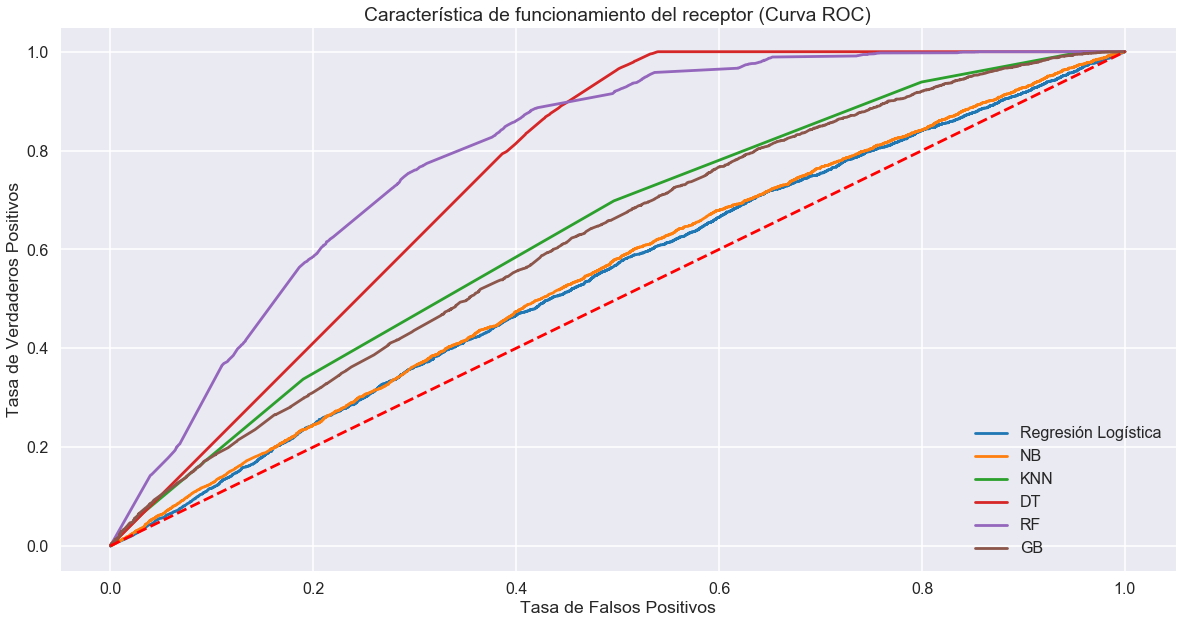

In [373]:
plt.figure(figsize=(20,10))
plt.plot(logit_fpr, logit_tpr, label='Regresión Logística')
plt.plot(NB_fpr, NB_tpr, label='NB')
plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(DT_fpr, DT_tpr, label='DT')
plt.plot(RF_fpr, RF_tpr, label='RF')
plt.plot(GB_fpr, GB_tpr, label='GB')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")
;